In [1]:
import warnings
warnings.filterwarnings('ignore')

## Step 1: Load & Inspect the Data

In [2]:
import pandas as pd

df = pd.read_csv('student_performance_dataset.csv')
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       966 non-null    object 
 2   Gender                     952 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          950 non-null    float64
 5   PreviousGrade              967 non-null    float64
 6   ExtracurricularActivities  957 non-null    float64
 7   ParentalSupport            978 non-null    object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                976 non-null    float64
 10  Attendance (%)             959 non-null    float64
 11  Online Classes Taken       975 non-null    object 
dtypes: float64(8), object(4)
memory usage: 93.9+ KB


## Step 2: Clean the Data

- **Missing values** in most columns.

- **Duplicate or redundant columns:** AttendanceRate vs Attendance (%), and StudyHoursPerWeek vs Study Hours.

#### Check for missing values:

In [4]:
df.isnull().sum()

StudentID                    40
Name                         34
Gender                       48
AttendanceRate               40
StudyHoursPerWeek            50
PreviousGrade                33
ExtracurricularActivities    43
ParentalSupport              22
FinalGrade                   40
Study Hours                  24
Attendance (%)               41
Online Classes Taken         25
dtype: int64

#### Remove Irrelevant Columns
- **StudentID:** It's just a unique identifier, not a feature that contributes to performance.
- **Name:** It's a text field unique per student, not useful for analysis.

In [5]:
df.drop(columns=['StudentID', 'Name'], inplace=True)

#### Remove Redundant Columns

In [6]:
df.drop(columns=['Study Hours', 'Attendance (%)'], inplace=True)

#### Handle Numerical Columns

In [7]:
# View numerical columns
num_cols = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade',
            'ExtracurricularActivities', 'FinalGrade']

# Fill missing numerical values with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

#### Handle Categorical Columns

In [8]:
# View categorical columns
cat_cols = ['Gender', 'ParentalSupport', 'Online Classes Taken']

# Fill missing categorical values with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

#### Final Check for missing values:

In [9]:
df.isnull().sum()

Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
Online Classes Taken         0
dtype: int64

## Step 3: Exploratory Data Analysis (EDA)

#### Summary Statistics

In [10]:
df.describe()

,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,85.610000,17.649000,77.612000,1.498000,80.029000
std,7.200399,6.113688,9.840238,1.029104,9.301649
min,70.000000,8.000000,60.000000,0.000000,62.000000
25%,82.000000,12.000000,70.000000,1.000000,72.000000
50%,88.000000,18.000000,78.000000,1.000000,80.000000
75%,91.000000,22.000000,86.000000,2.000000,88.000000
max,95.000000,30.000000,90.000000,3.000000,92.000000


#### Visual Analysis

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Gender Distribution

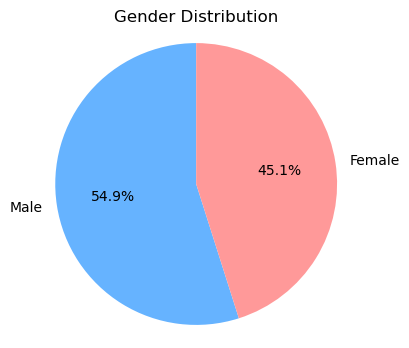

In [12]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

#### Gender-wise Performance

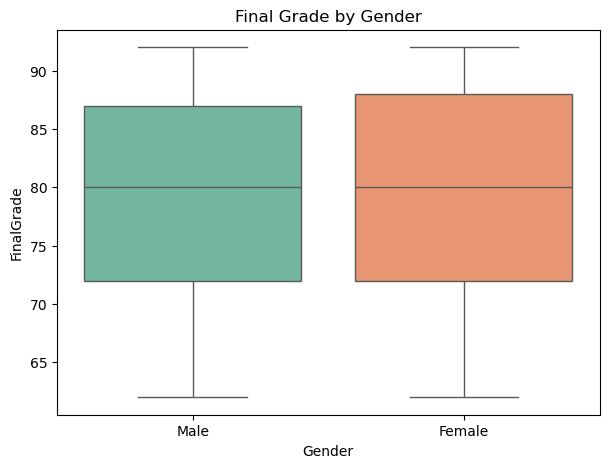

In [13]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Gender', y='FinalGrade', data=df, palette='Set2')
plt.title('Final Grade by Gender')
plt.show()

#### Parental Support Distribution

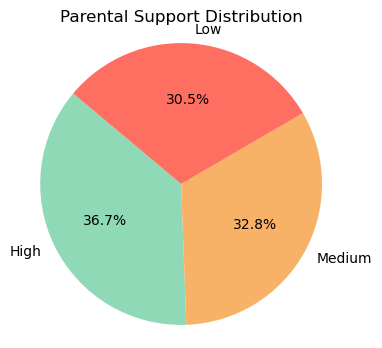

In [14]:
support_counts = df['ParentalSupport'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(support_counts, labels=support_counts.index, autopct='%1.1f%%', startangle=140, colors=['#8fd9b6', '#f7b267', '#ff6f61'])
plt.title('Parental Support Distribution')
plt.axis('equal')
plt.show()

#### Parental Support vs Final Grade

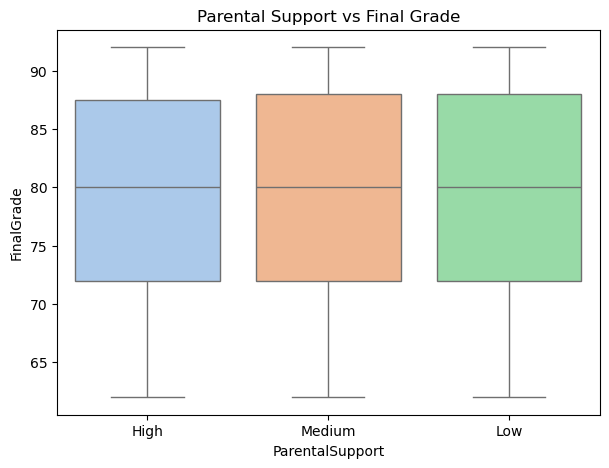

In [15]:
plt.figure(figsize=(7,5))
sns.boxplot(x='ParentalSupport', y='FinalGrade', data=df, palette='pastel')
plt.title('Parental Support vs Final Grade')
plt.show()

#### Online Classes Participation

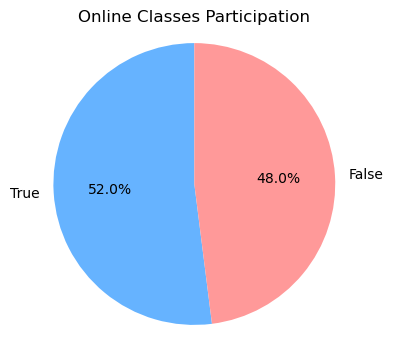

In [16]:
online_counts = df['Online Classes Taken'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(online_counts, labels=online_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Online Classes Participation')
plt.axis('equal')
plt.show()

#### Online Classes Participation vs Final Grade

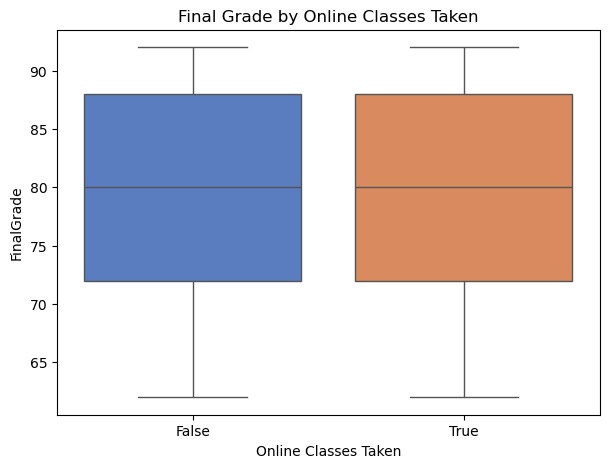

In [17]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Online Classes Taken', y='FinalGrade', data=df, palette='muted')
plt.title('Final Grade by Online Classes Taken')
plt.show()

#### Study Hours Per Week vs Final Grade

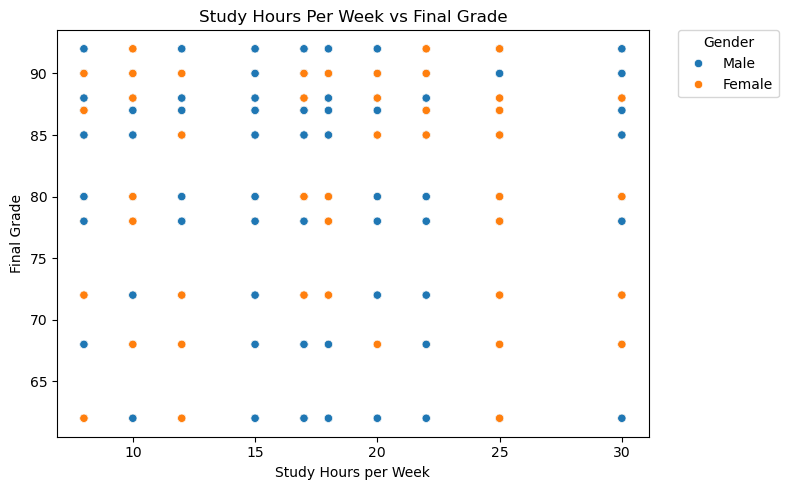

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='StudyHoursPerWeek', y='FinalGrade', hue='Gender', data=df)
plt.title('Study Hours Per Week vs Final Grade')
plt.xlabel('Study Hours per Week')
plt.ylabel('Final Grade')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

#### Attendance Rate vs Final Grade

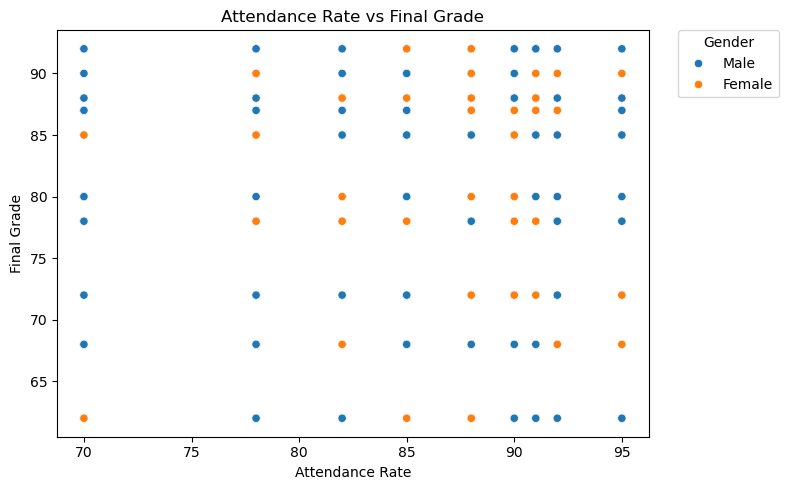

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='AttendanceRate', y='FinalGrade', hue='Gender', data=df)
plt.title('Attendance Rate vs Final Grade')
plt.xlabel('Attendance Rate')
plt.ylabel('Final Grade')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

#### Extracurricular Activities vs Final Grade

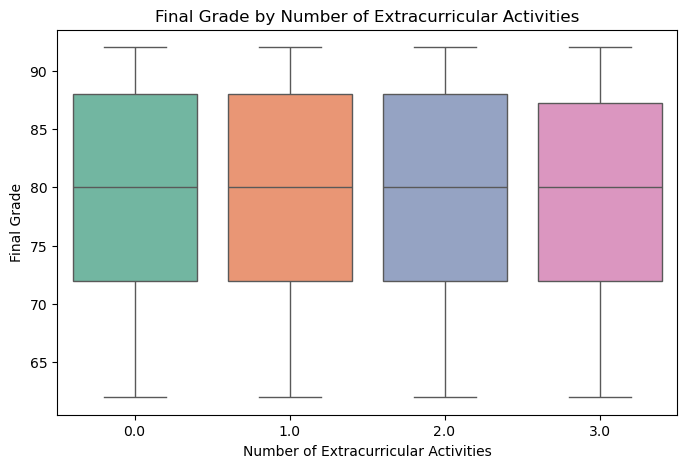

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x='ExtracurricularActivities', y='FinalGrade', data=df, palette='Set2')
plt.title('Final Grade by Number of Extracurricular Activities')
plt.xlabel('Number of Extracurricular Activities')
plt.ylabel('Final Grade')
plt.show()

#### Final Grade by Extracurricular Activities and Gender

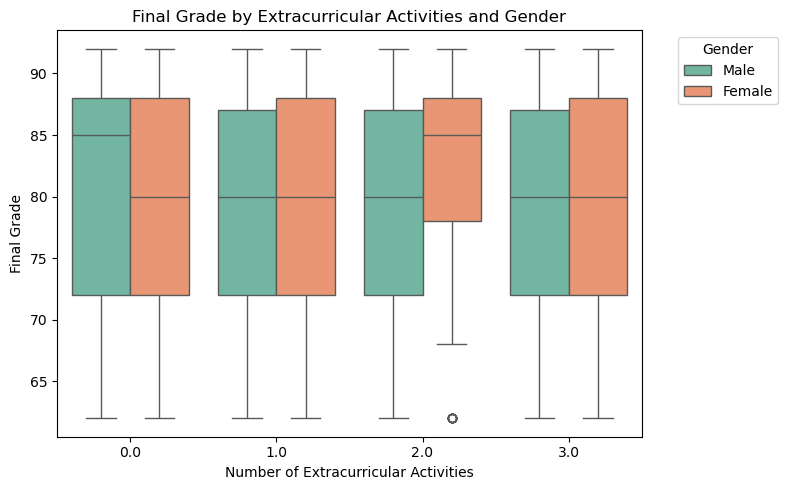

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x='ExtracurricularActivities', y='FinalGrade', hue='Gender', data=df, palette='Set2')

plt.title('Final Grade by Extracurricular Activities and Gender')
plt.xlabel('Number of Extracurricular Activities')
plt.ylabel('Final Grade')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Previous Grade vs Final Grade

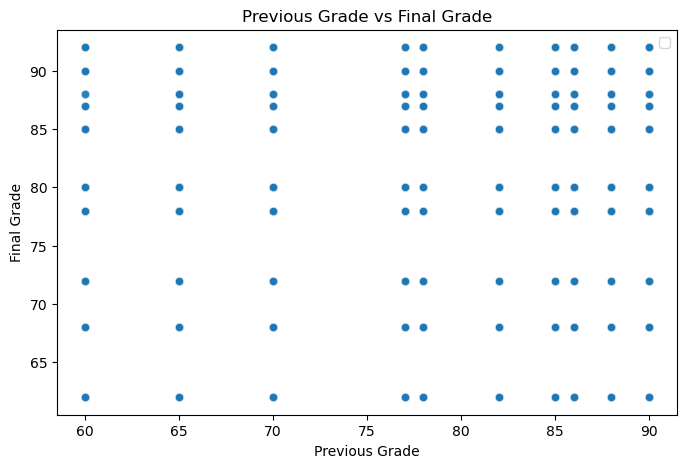

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='PreviousGrade', y='FinalGrade', data=df, alpha=0.6)
plt.title('Previous Grade vs Final Grade')
plt.xlabel('Previous Grade')
plt.ylabel('Final Grade')
plt.legend()
plt.show()

#### Previous Grade vs Final Grade by Gender

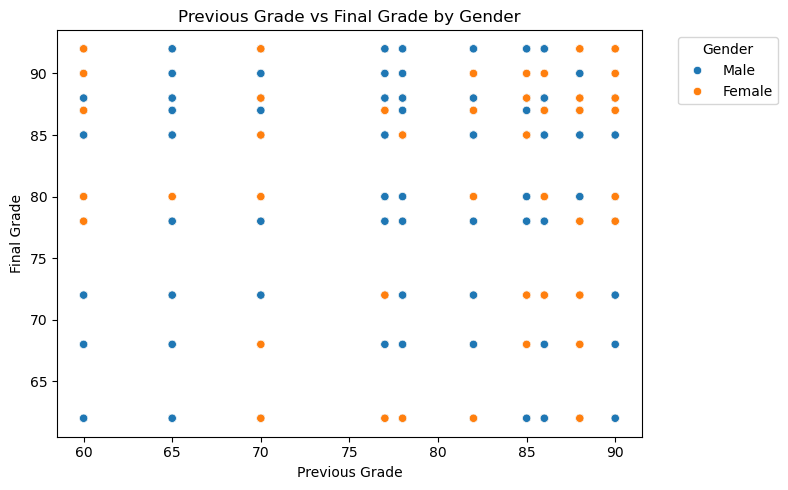

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='PreviousGrade', y='FinalGrade', data=df, hue='Gender')
plt.title('Previous Grade vs Final Grade by Gender')
plt.xlabel('Previous Grade')
plt.ylabel('Final Grade')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Distribution of Final Grades by Gender

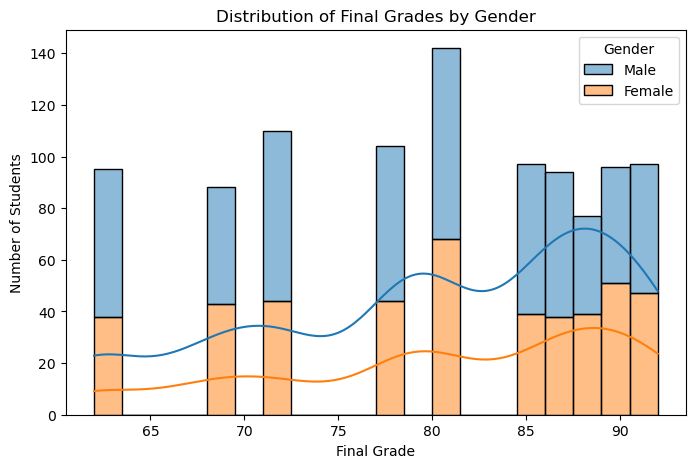

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='FinalGrade', bins=20, kde=True, hue='Gender', multiple='stack')
plt.title('Distribution of Final Grades by Gender')
plt.xlabel('Final Grade')
plt.ylabel('Number of Students')
plt.show()

#### Correlation Heatmap
- To show how all numerical features relate to FinalGrade

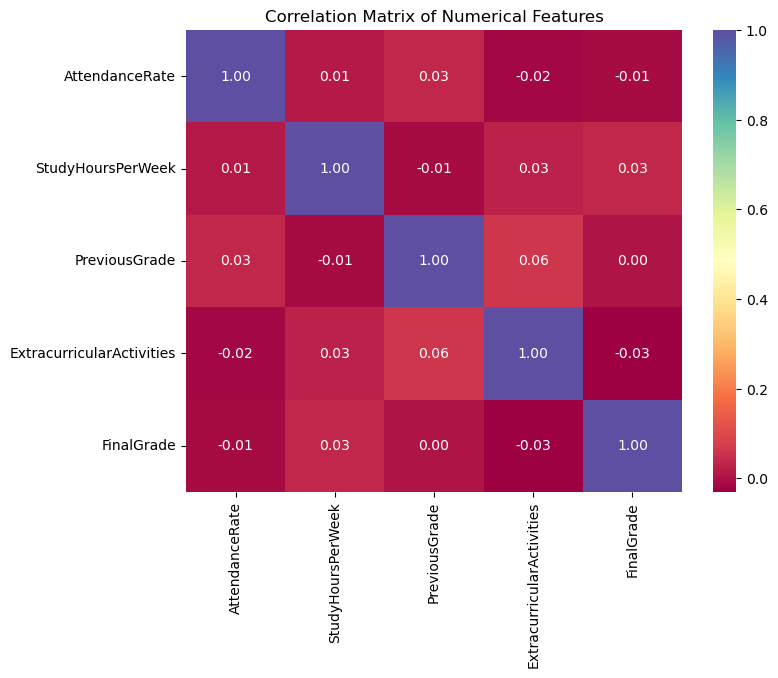

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='Spectral', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()